<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/Task-Week-11/week11/LeNet_Lecture_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Arya Fridayana Gastiadi
###1103210082
###Lecture : 11
###Model: LeNet


LeNet adalah salah satu arsitektur jaringan saraf tiruan (neural network) yang dirancang untuk pengenalan pola, khususnya dalam pengenalan karakter tulisan tangan. LeNet pertama kali diperkenalkan oleh Yann LeCun dan rekannya pada akhir 1980-an dan awal 1990-an. Arsitektur LeNet, khususnya LeNet-5, menjadi sangat terkenal dan berpengaruh dalam pengembangan teknik pengenalan gambar dan deep learning.

### Struktur LeNet-5

LeNet-5 adalah versi paling terkenal dari LeNet dan memiliki struktur sebagai berikut:

1. **Input Layer**: Gambar ukuran 32x32 piksel.
2. **C1 - Convolutional Layer**: 6 feature maps dengan kernel (filter) ukuran 5x5, menghasilkan 6 feature maps ukuran 28x28.
3. **S2 - Subsampling Layer (Pooling Layer)**: 6 feature maps ukuran 14x14 melalui average pooling dengan faktor subsampling 2x2.
4. **C3 - Convolutional Layer**: 16 feature maps dengan kernel ukuran 5x5, menghasilkan 16 feature maps ukuran 10x10.
5. **S4 - Subsampling Layer (Pooling Layer)**: 16 feature maps ukuran 5x5 melalui average pooling dengan faktor subsampling 2x2.
6. **C5 - Convolutional Layer**: 120 feature maps ukuran 1x1 dengan kernel ukuran 5x5.
7. **F6 - Fully Connected Layer**: 84 neurons.
8. **Output Layer**: Softmax layer dengan 10 output units untuk klasifikasi 10 digit (0-9).

### Kelebihan dan Penggunaan

LeNet-5 dirancang khusus untuk pengenalan karakter tulisan tangan dan telah digunakan secara luas dalam pengenalan digit tulisan tangan (seperti dataset MNIST). Beberapa kelebihan dari LeNet-5 adalah:

- **Efisiensi Komputasi**: Arsitektur ini dirancang untuk bekerja dengan baik pada perangkat keras yang tersedia pada saat itu.
- **Penggunaan Convolutional dan Pooling Layers**: Pendekatan ini mengurangi dimensionalitas data secara efektif sambil mempertahankan fitur penting dalam gambar.
- **Fully Connected Layers**: Memungkinkan jaringan untuk membuat keputusan klasifikasi berdasarkan fitur yang diekstrak.

LeNet adalah salah satu fondasi penting dalam pengembangan jaringan saraf convolutional (CNN) dan telah membuka jalan bagi arsitektur yang lebih kompleks seperti AlexNet, VGGNet, dan ResNet yang digunakan dalam berbagai aplikasi modern dalam computer vision.

#Memuat Library

In [9]:
# Import Library yang diperlukan
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

#Memuat Dataset

In [10]:
# Memuat Dataset dan melakukan Pemisahan Dataset (Train & Testing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Pra-Prosesan

In [11]:
# Menjalankan Operasi Reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalisasi
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#Arsitektur LeNet

In [12]:
# Membangun Arsitektur Model
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Melatih Model

In [13]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, batch_size=360, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
167/167 [==============================] - 27s 151ms/step - loss: 0.5743 - accuracy: 0.8426 - val_loss: 0.1707 - val_accuracy: 0.9489
Epoch 2/20
167/167 [==============================] - 23s 135ms/step - loss: 0.1456 - accuracy: 0.9562 - val_loss: 0.1075 - val_accuracy: 0.9668
Epoch 3/20
167/167 [==============================] - 18s 110ms/step - loss: 0.1023 - accuracy: 0.9691 - val_loss: 0.0819 - val_accuracy: 0.9740
Epoch 4/20
167/167 [==============================] - 20s 119ms/step - loss: 0.0814 - accuracy: 0.9750 - val_loss: 0.0637 - val_accuracy: 0.9786
Epoch 5/20
167/167 [==============================] - 18s 110ms/step - loss: 0.0681 - accuracy: 0.9792 - val_loss: 0.0547 - val_accuracy: 0.9819
Epoch 6/20
167/167 [==============================] - 20s 120ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0466 - val_accuracy: 0.9843
Epoch 7/20
167/167 [==============================] - 19s 112ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0426 - val_ac

#Evaluasi Model

In [15]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.0306 - accuracy: 0.9897
Test Loss: 0.030643487349152565
Test accuracy: 0.9897000193595886


In [16]:
# Total data training
total_train_data = len(x_train)
# Total data testing
total_test_data = len(x_test)

print("Total data training set:", total_train_data)
print("Total data testing set:", total_test_data)

Total data training set: 60000
Total data testing set: 10000


In [17]:
# Predictions on training data
train_predictions = model.predict(x_train)
train_correct = sum([1 for i in range(len(train_predictions)) if np.argmax(train_predictions[i]) == np.argmax(y_train[i])])

# Predictions on testing data
test_predictions = model.predict(x_test)
test_correct = sum([1 for i in range(len(test_predictions)) if np.argmax(test_predictions[i]) == np.argmax(y_test[i])])

print("Total correct predictions training data:", train_correct)
print("Total correct predictions testing data:", test_correct)

313/313 [==============================] - 2s 6ms/step
Total correct predictions training data: 59807
Total correct predictions testing data: 9897


#Visualisasi Model

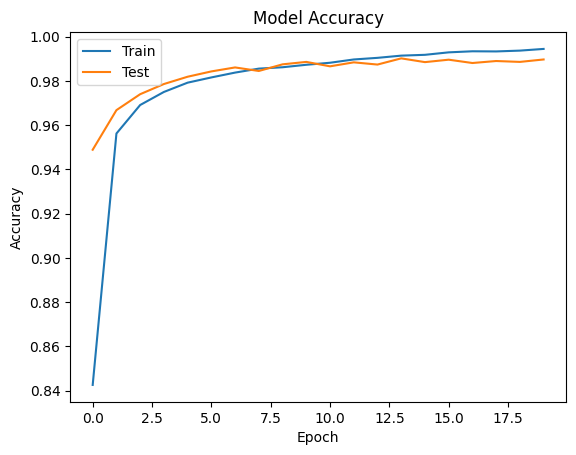

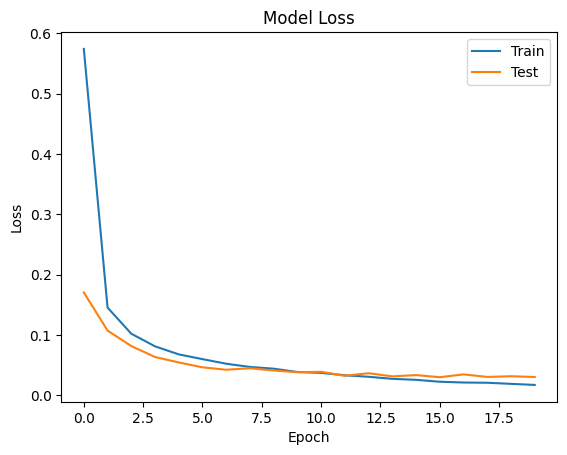

In [18]:
# Plotting model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()